In [1]:
import numpy as np
import scipy.linalg as la
from scipy.linalg import null_space
from scipy.linalg import qr
from numpy.linalg import svd
import math
import sympy 
from sympy import Matrix
from scipy.linalg import null_space
import matplotlib.pyplot as plt
import random


def subspace_dist(Phi1,Phi2):
    S_comp = null_space(Phi2.T)
    return la.norm(Phi1.T@S_comp,2)


def simulate_system(A,x):
    return A @ x

def get_basis(A):
    e_i_p = []
    for i in range(dx):
        e_i = np.zeros(dx)
        e_i[i] = 1
        e_i_p.append(simulate_system(A,e_i))
        
    return e_i_p

def adjoint_data(x0,T,e_i_p):
    dx = x0.shape[0]
    X = np.zeros((dx,T))
    x = x0
    for t in range(T):
        x_adj = np.zeros(dx)
        for i in range(dx):
            x_adj[i] = np.dot(e_i_p[i], x)
        x = x_adj
        X[:,t] = x.reshape(dx,)    
    return X

$\textbf{Case 1: Diagonalizable system}$

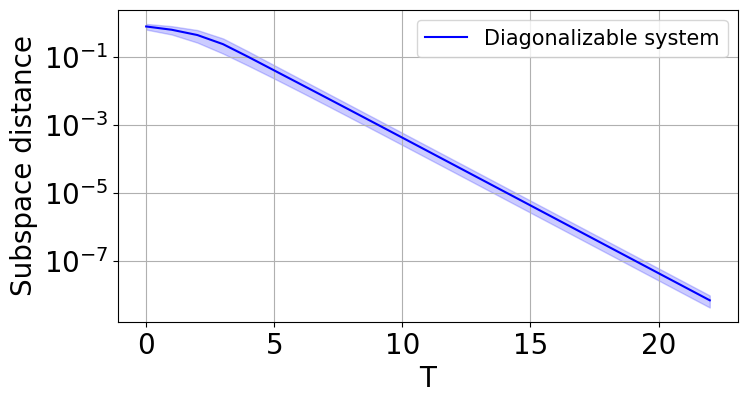

In [5]:
l = 2 
dx = 3

A0 =  np.array([[ 2,   0,    0.2],
               [ 1,    3,    0.2],
               [ 0,    0,    0.8]])


A = Matrix(A0.T)
P,D = (A).jordan_form()

#Ground truth representation
Phi = P[:,[i for i, val in enumerate(D.diagonal()) if val >= 1]]
Phi = np.array(Phi).astype(np.float64)
Phi,_= qr(Phi,mode='economic')
Phi = Phi[:,:l]


Ts = np.arange(2,25) #Time horizon

#Learning the left unstable subspace: 

nr = 10 #number of realization

subspace_distance_realizations = []

e_i_p = get_basis(A0)

for i in range(nr):
    subspace_distances = []
    x0 = np.random.randn(dx,1)
    for j in range(len(Ts)):
        T = Ts[j] #horizon length
        D = adjoint_data(x0,T,e_i_p)
        U,S,V = svd(D)
        Phi_hat = U[:,:l]
        subspace_distances.append(subspace_dist(Phi_hat,Phi)) 
    subspace_distance_realizations.append(subspace_distances)
        
sb1 = np.zeros((nr,len(Ts)))
for i in range(nr):
    sb1[i,:] = subspace_distance_realizations[i]

# Calculate the mean and standard error of the mean (SEM)
mean_1 = np.mean(sb1, axis=0)
sem_1 = np.std(sb1, axis=0) / np.sqrt(sb1.shape[0])

# Calculate 95% confidence intervals
ci_1 = 1.95*sem_1
        
plt.figure(figsize=(8,4))

plot_1=plt.semilogy(np.arange(len(mean_1)), mean_1, label='Diagonalizable system', color='blue')
fill_1=plt.fill_between(np.arange(len(mean_1)), mean_1-ci_1, mean_1+ci_1, color='blue', alpha=0.2)

plt.ylabel(r'Subspace distance',fontsize=20)
plt.xlabel('T',fontsize=20)
plt.tick_params(axis='both', labelsize=20)

plt.legend(fontsize=15)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels,fontsize=15)
plt.subplots_adjust(bottom=0.10)
plt.grid()

$\textbf{Case 2: Non-diagonalizable system with geometric multiplicity for the unstable modes equal to one}$

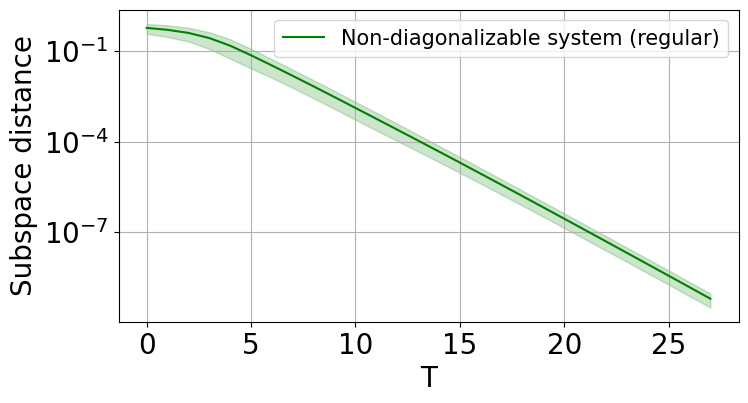

In [12]:
A0 = np.array([[ 2,    0,    0.2],
               [ 1,    2,    0.2],
               [ 0,    0,    0.8]])

A = Matrix(A0.T)
P,D = (A).jordan_form()

Phi = P[:,[i for i, val in enumerate(D.diagonal()) if val >= 1]]
Phi = np.array(Phi).astype(np.float64)
Phi,_= qr(Phi,mode='economic')
Phi = Phi[:,:l]

Ts = np.arange(2,30) #Time horizon

nr = 10 #number of realizations
subspace_distance_realizations = []

e_i_p = get_basis(A0)

for i in range(nr):
    subspace_distances = []
    x0 = np.random.randn(dx,1)
    for j in range(len(Ts)):
        T = Ts[j] #horizon length
        D = adjoint_data(x0,T,e_i_p)
        U,S,V = svd(D)
        Phi_hat = U[:,:l]
        subspace_distances.append(subspace_dist(Phi_hat,Phi))

    subspace_distance_realizations.append(subspace_distances)
        
sb2 = np.zeros((nr,len(Ts)))
for i in range(nr):
    sb2[i,:] = subspace_distance_realizations[i]

# Calculate mean and standard error of the mean (SEM)
mean_2 = np.mean(sb2, axis=0)
sem_2 = np.std(sb2, axis=0) / np.sqrt(sb2.shape[0])

# Calculate 95% confidence intervals
ci_2 = 1.95*sem_2
              
plt.figure(figsize=(8,4))

plot_2=plt.semilogy(np.arange(len(mean_2)), mean_2, label='Non-diagonalizable system (regular)', color='green')
fill_2=plt.fill_between(np.arange(len(mean_2)), mean_2-ci_2, mean_2+ci_2, color='green', alpha=0.2)
plt.ylabel(r'Subspace distance',fontsize=20)
plt.xlabel('T',fontsize=20)
plt.tick_params(axis='both', labelsize=20)
plt.legend(fontsize=15)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels,fontsize=15)
plt.subplots_adjust(bottom=0.10)
plt.grid()

$\textbf{Case 3: Non-diagonalizable system with geometric multiplicity for the unstable modes greater than one}$

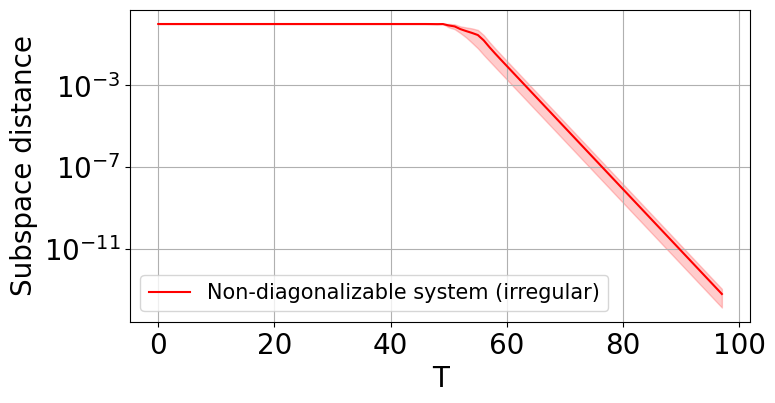

In [27]:
A0 = np.array([[2, 0,  0],
              [ 0, 2,  0],
              [ 0, 0, 0.8]]) 


A = Matrix(A0.T)
P,D = (A).jordan_form()

Phi = P[:,[i for i, val in enumerate(D.diagonal()) if val >= 1]]
Phi = np.array(Phi).astype(np.float64)
Phi,_= qr(Phi,mode='economic')
Phi = Phi[:,:l]


Ts = np.arange(2,100)

#Learning the left unstable subspace: 

nr = 10
subspace_distance_realizations = []

e_i_p = get_basis(A0)

for i in range(nr):
    subspace_distances = []
    x0 = np.random.randn(dx,1)
    for j in range(len(Ts)):
        T = Ts[j] #horizon length
        D = adjoint_data(x0,T,e_i_p)
        U,S,V = svd(D)
        Phi_hat = U[:,:l]
        subspace_distances.append(subspace_dist(Phi_hat,Phi))
    subspace_distance_realizations.append(subspace_distances)
        
sb3 = np.zeros((nr,len(Ts)))
for i in range(nr):
    sb3[i,:] = subspace_distance_realizations[i]

# Calculate mean and standard error of the mean (SEM)
mean_3 = np.mean(sb3, axis=0)
sem_3 = np.std(sb3, axis=0) / np.sqrt(sb3.shape[0])

# Calculate 95% confidence intervals
ci_3 = 1.95*sem_3
        
plt.figure(figsize=(8,4))

plot_3=plt.semilogy(np.arange(len(mean_3)), mean_3, label='Non-diagonalizable system (irregular)', color='red')
fill_3=plt.fill_between(np.arange(len(mean_3)), mean_3-ci_3, mean_3+ci_3, color='red', alpha=0.2)
plt.ylabel(r'Subspace distance',fontsize=20)
plt.xlabel('T',fontsize=20)
plt.tick_params(axis='both', labelsize=20)
plt.legend(fontsize=15)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels,fontsize=15)
plt.subplots_adjust(bottom=0.10)
plt.grid()

$\textbf{Case 4: Non-diagonalizable system with geometric multiplicity for the unstable modes equal to one and marginal stability:}$

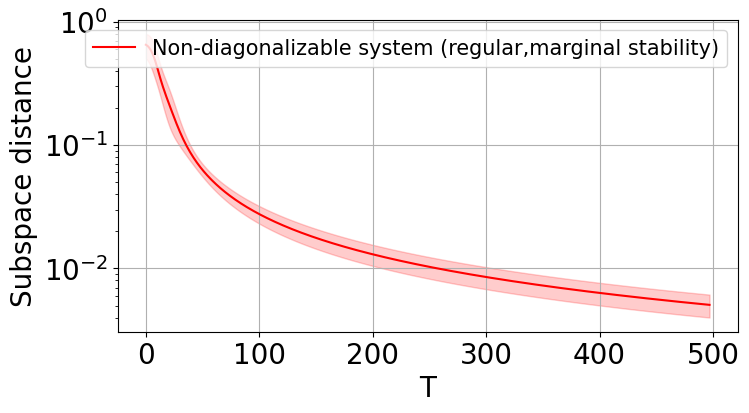

In [21]:
eps = 1e-5
A0 = np.array([[ 1+eps,    0,    0.2],
               [ 1,    1+eps,    0.2],
               [ 0,    0,    0.8]])



A = Matrix(A0.T)
P,D = (A).jordan_form()


Phi = P[:,[i for i, val in enumerate(D.diagonal()) if val >= 1]]
Phi = np.array(Phi).astype(np.float64)
Phi,_= qr(Phi,mode='economic')
Phi = Phi[:,:l]

Ts = np.arange(2,500)

#Learning the left unstable subspace: 
nr = 10
subspace_distance_realizations = []

e_i_p = get_basis(A0)

for n in range(nr):
    subspace_distances = []
    x0 = np.random.randn(dx,1)
    for j in range(len(Ts)):
        T = Ts[j] #horizon length
        D = adjoint_data(x0,T,e_i_p)
        U,S,V = svd(D)
        Phi_hat = U[:,:l]
        subspace_distances.append(subspace_dist(Phi_hat,Phi))

    subspace_distance_realizations.append(subspace_distances)
        
sb4 = np.zeros((nr,len(Ts)))
for i in range(nr):
    sb4[i,:] = subspace_distance_realizations[i]

# Calculate mean and standard error of the mean (SEM)
mean_4 = np.mean(sb4, axis=0)
sem_4 = np.std(sb4, axis=0) / np.sqrt(sb4.shape[0])

# Calculate 95% confidence intervals
ci_4 = 1.95*sem_4
              
plt.figure(figsize=(8,4))

plot_4=plt.semilogy(np.arange(len(mean_4)), mean_4, label='Non-diagonalizable system (regular,marginal stability)', color='red')
fill_4=plt.fill_between(np.arange(len(mean_4)), mean_4-ci_4, mean_4+ci_4, color='red', alpha=0.2)

plt.ylabel(r'Subspace distance',fontsize=20)
plt.xlabel('T',fontsize=20)
plt.tick_params(axis='both', labelsize=20)

plt.legend(fontsize=15)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels,fontsize=15)
plt.subplots_adjust(bottom=0.10)
plt.grid()

$\textbf{Case 5: Non-diagonalizable system with geometric multiplicity for the unstable modes greater than one and marginal stability:}$

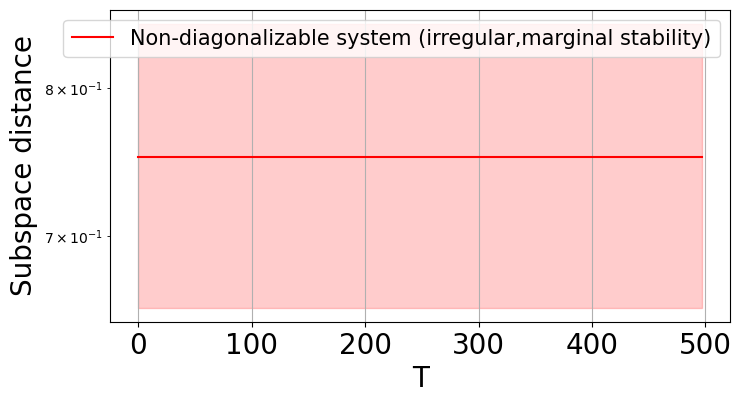

In [22]:
eps = 1e-5
A0 = np.array([[ 1+eps,    0,    0.2],
               [ 0,    1+eps,    0.2],
               [ 0,    0,        0.8]])

A = Matrix(A0.T)
P,D = (A).jordan_form()


Phi = P[:,[i for i, val in enumerate(D.diagonal()) if val >= 1]]
Phi = np.array(Phi).astype(np.float64)
Phi,_= qr(Phi,mode='economic')
Phi = Phi[:,:l]

Ts = np.arange(2,500)

nr = 10
subspace_distance_realizations = []

e_i_p = get_basis(A0)

for n in range(nr):
    subspace_distances = []
    x0 = np.random.randn(dx,1)
    for j in range(len(Ts)):
        T = Ts[j] #horizon length
        D = adjoint_data(x0,T,e_i_p)
        U,S,V = svd(D)
        Phi_hat = U[:,:l]
        subspace_distances.append(subspace_dist(Phi_hat,Phi))
    subspace_distance_realizations.append(subspace_distances)
        
sb5 = np.zeros((nr,len(Ts)))
for i in range(nr):
    sb5[i,:] = subspace_distance_realizations[i]

# Calculate mean and standard error of the mean (SEM)
mean_5 = np.mean(sb5, axis=0)
sem_5 = np.std(sb5, axis=0) / np.sqrt(sb5.shape[0])

# Calculate 95% confidence intervals
ci_5 = 1.95*sem_5
             
plt.figure(figsize=(8,4))

plot_5=plt.semilogy(np.arange(len(mean_5)), mean_5, label='Non-diagonalizable system (irregular,marginal stability)', color='red')
fill_5=plt.fill_between(np.arange(len(mean_5)), mean_5-ci_5, mean_5+ci_5, color='red', alpha=0.2)
plt.ylabel(r'Subspace distance',fontsize=20)
plt.xlabel('T',fontsize=20)
plt.tick_params(axis='both', labelsize=20)

plt.legend(fontsize=15)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels,fontsize=15)
plt.subplots_adjust(bottom=0.10)
plt.grid()

$\textbf{Plotting the results:}$

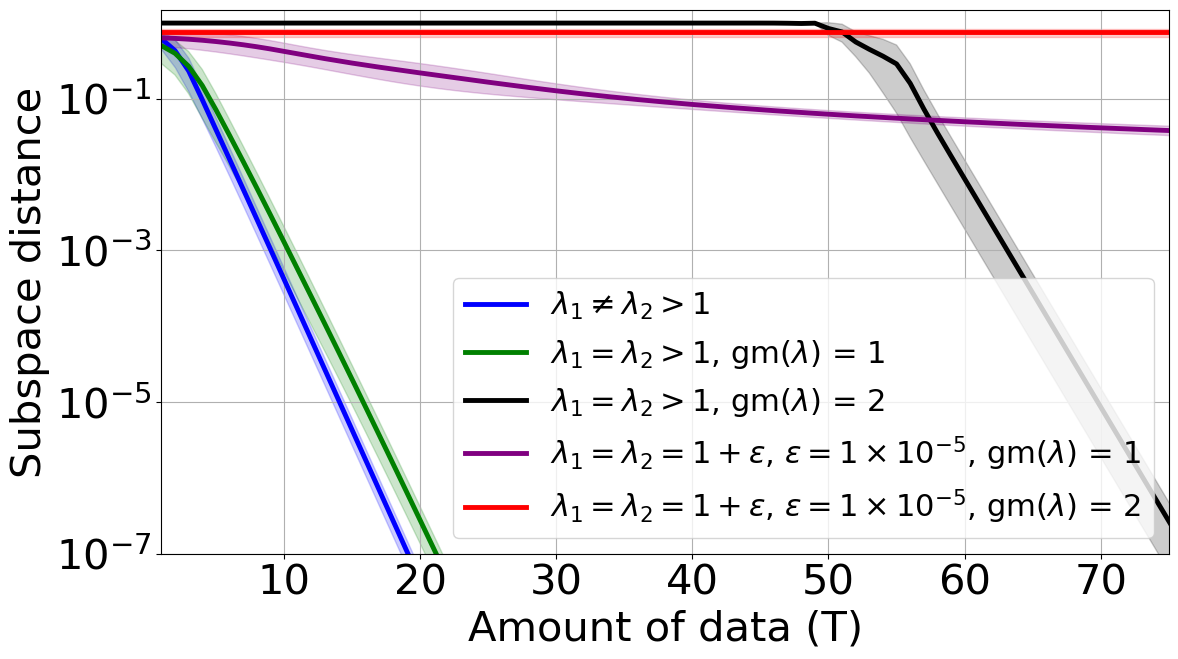

In [28]:
plt.figure(figsize=(13,8))

plot_1=plt.semilogy(np.arange(len(mean_1)), mean_1, label=r'$\lambda_1 \neq \lambda_2 > 1$', color='blue',linewidth=3.5)
fill_1=plt.fill_between(np.arange(len(mean_1)), mean_1-ci_1, mean_1+ci_1, color='blue', alpha=0.2)

plot_2=plt.semilogy(np.arange(len(mean_2)), mean_2, label=r'$\lambda_1 = \lambda_2 > 1$, gm$(\lambda)$ = 1', color='green',linewidth=3.5)
fill_2=plt.fill_between(np.arange(len(mean_2)), mean_2-ci_2, mean_2+ci_2, color='green', alpha=0.2)

plot_3=plt.semilogy(np.arange(len(mean_3)), mean_3, label=r'$\lambda_1 = \lambda_2 > 1$, gm$(\lambda)$ = 2', color='black',linewidth=3.5)
fill_3=plt.fill_between(np.arange(len(mean_3)), mean_3-ci_3, mean_3+ci_3, color='black', alpha=0.2)

plot_4=plt.semilogy(np.arange(len(mean_4)), mean_4, label=r'$\lambda_1= \lambda_2 = 1 +\varepsilon$, $\varepsilon = 1\times 10^{-5}$, gm$(\lambda)$ = 1', color='purple',linewidth=3.5)
fill_4=plt.fill_between(np.arange(len(mean_4)), mean_4-ci_4, mean_4+ci_4, color='purple', alpha=0.2)

plot_5=plt.semilogy(np.arange(len(mean_5)), mean_5, label=r'$\lambda_1= \lambda_2 = 1 +\varepsilon$, $\varepsilon = 1\times 10^{-5}$, gm$(\lambda)$ = 2', color='red',linewidth=3.5)
fill_5=plt.fill_between(np.arange(len(mean_5)), mean_5-ci_5, mean_5+ci_5, color='red', alpha=0.2)

plt.ylabel(r'Subspace distance',fontsize=30)
plt.xlabel('Amount of data (T)',fontsize=30)
plt.tick_params(axis='both', labelsize=30)

plt.legend(loc='lower right',fontsize=22)
# Exclude the shading elements from the legend
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[:5]  # Keep only the handles for the curve lines
labels = labels[:5]  # Keep only the labels for the curve lines
#plt.legend(handles=handles, labels=labels,fontsize=15)
plt.ylim(1e-7, 1.5)
plt.xlim(1, 75)

plt.subplots_adjust(bottom=0.20)
plt.grid()
plt.savefig("subspace_dist.pdf")